In [1]:
import tensorflow as tf
import numpy as np
import csv
import random

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

In [2]:
drugs = {}

with open('/content/drugs.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        drugs[row[0]] = row[2]

drugs

{'0': 'CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 '1': 'CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C5=C(C=C(C=C5)OCCN6CCOCC6)SC4=N3',
 '2': 'CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)NC3=CC=C(C=C3)OC4=NC=NC(=C4)NC)C(F)(F)F',
 '3': 'C1CNCCC1NC(=O)C2=C(C=NN2)NC(=O)C3=C(C=CC=C3Cl)Cl',
 '4': 'CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C=C3)F)Cl)OC4CCOC4',
 '5': 'CN1CCC(C(C1)O)C2=C(C=C(C3=C2OC(=CC3=O)C4=CC=CC=C4Cl)O)O',
 '6': 'CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=CC=CC=N4',
 '7': 'CCC1C(=O)N(C2=CN=C(N=C2N1C3CCCC3)NC4=C(C=C(C=C4)C(=O)NC5CCN(CC5)C)OC)C',
 '8': 'CC1=CC2=C(C=C1)N=C(C3=NC=C(N23)C)NCCN.Cl',
 '9': 'CCN(CCCOC1=CC2=C(C=C1)C(=NC=N2)NC3=NNC(=C3)CC(=O)NC4=CC(=CC=C4)F)CCO',
 '10': 'CN1CCN(CC1)CCCOC2=C(C=C3C(=C2)N=CC(=C3NC4=CC(=C(C=C4Cl)Cl)OC)C#N)OC',
 '11': 'CC1=CC2=C(N1)C=CC(=C2F)OC3=NC=NN4C3=C(C(=C4)OCC(C)O)C',
 '12': 'CN1C2=C(C=C(C=C2)OC3=CC(=NC=C3)C4=NC=C(N4)C(F)(F)F)N=C1NC5=CC=C(C=C5)C(F)(F)F',
 '13': 'C1CC1CONC(=O)C2=C(C(=C(C=C2)F)F)NC3=C(C=C(C=C3)I)Cl',
 '14':

In [3]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [4]:
proteins = {}

with open('/content/proteins.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader)
  for row in reader:
    proteins[row[0]] = row[3]

len(proteins)

433

In [5]:
data = []

with open('/content/drug_protein_affinity.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader)
  for row in reader:
    triplet = []
    triplet.append(row[0])
    triplet.append(row[1])
    triplet.append(float(row[2]))
    data.append(triplet)

len(data)

29444

In [6]:
print(drugs[data[0][0]])
print(proteins[data[0][1]])
print(data[0][2])

CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N
MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQQPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSESSLPNL

In [7]:
drug = []
protein = []
affinity = []

for i in range(len(data)):
  drug.append(drugs[data[i][0]])
  protein.append(proteins[data[i][1]])
  affinity.append(data[i][2])

In [8]:
print(drug[0])
print(protein[0])
print(affinity[0])

CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N
MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQQPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSESSLPNL

In [9]:
split = int(len(drug) * 0.9)
train_drug = drug[:split]
train_protein = protein[:split]
train_affinity = affinity[:split]
test_drug = drug[split:]
test_protein = protein[split:]
test_affinity = affinity[split:]

In [10]:
tokenizer_drug = Tokenizer(char_level = True)
tokenizer_drug.fit_on_texts(train_drug)

word_index_drug = tokenizer_drug.word_index
vocab_size_drug = len(word_index_drug)

train_sequences_drug = tokenizer_drug.texts_to_sequences(train_drug)
train_padded_drug = pad_sequences(train_sequences_drug, truncating = "post", maxlen = 85)

test_sequences_drug = tokenizer_drug.texts_to_sequences(test_drug)
test_padded_drug = pad_sequences(test_sequences_drug, truncating = "post", maxlen = 85)

In [11]:
tokenizer_protein = Tokenizer(char_level = True)
tokenizer_protein.fit_on_texts(train_protein)

word_index_protein = tokenizer_protein.word_index
vocab_size_protein = len(word_index_protein)

train_sequences_protein = tokenizer_protein.texts_to_sequences(train_protein)
train_padded_protein = pad_sequences(train_sequences_protein, truncating = "post", maxlen = 1200)

test_sequences_protein = tokenizer_protein.texts_to_sequences(test_protein)
test_padded_protein = pad_sequences(test_sequences_protein, truncating = "post", maxlen = 1200)

In [12]:
import pickle

# Save tokenizer_drug
with open('tokenizer_drug.pkl', 'wb') as f:
    pickle.dump(tokenizer_drug, f)

# Save tokenizer_protein
with open('tokenizer_protein.pkl', 'wb') as f:
    pickle.dump(tokenizer_protein, f)


In [13]:
print(vocab_size_drug)
print(vocab_size_protein)

24
20


In [14]:
train_drug_array = np.array(train_padded_drug)
train_protein_array = np.array(train_padded_protein)
train_affinity_array = np.array(train_affinity, dtype="float32")
test_drug_array = np.array(test_padded_drug)
test_protein_array = np.array(test_padded_protein)
test_affinity_array = np.array(test_affinity, dtype="float32")

print(f"Train drug array shape: {train_drug_array.shape}")
print(f"Train protein array shape: {train_protein_array.shape}")
print(f"Train affinity array shape: {train_affinity_array.shape}")
print(f"Test drug array shape: {test_drug_array.shape}")
print(f"Test protein array shape: {test_protein_array.shape}")
print(f"Test affinity array shape: {test_affinity_array.shape}")

Train drug array shape: (26499, 85)
Train protein array shape: (26499, 1200)
Train affinity array shape: (26499,)
Test drug array shape: (2945, 85)
Test protein array shape: (2945, 1200)
Test affinity array shape: (2945,)


In [15]:
from keras.layers import Input, Embedding, Conv1D, Dense, Concatenate, GlobalAveragePooling1D, Dropout
from keras.models import Model

drug_input = Input(shape=(85,))
protein_input = Input(shape=(1200,))

embed_drug = Embedding(vocab_size_drug + 1, 128, input_length=85)(drug_input)
conv_drug = Conv1D(32, 4, activation='relu')(embed_drug)
conv_drug = Conv1D(64, 6, activation='relu')(conv_drug)
conv_drug = Conv1D(96, 8, activation='relu')(conv_drug)
max_drug = GlobalAveragePooling1D()(conv_drug)

embed_protein = Embedding(vocab_size_protein + 1, 128, input_length=1200)(protein_input)
conv_protein = Conv1D(32, 4, activation='relu')(embed_protein)
conv_protein = Conv1D(64, 8, activation='relu')(conv_protein)
conv_protein = Conv1D(96, 12, activation='relu')(conv_protein)
max_protein = GlobalAveragePooling1D()(conv_protein)

concat = Concatenate()([max_drug, max_protein])

output = Dense(1024, activation="relu")(concat)
output = Dropout(0.1)(output)
output = Dense(1024, activation="relu")(output)
output = Dropout(0.1)(output)
output = Dense(512, activation="relu")(output)
output = Dense(1)(output)

model = Model(inputs=[drug_input, protein_input], outputs=output)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [16]:
model = Model(inputs=[drug_input, protein_input], outputs=output)

optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])

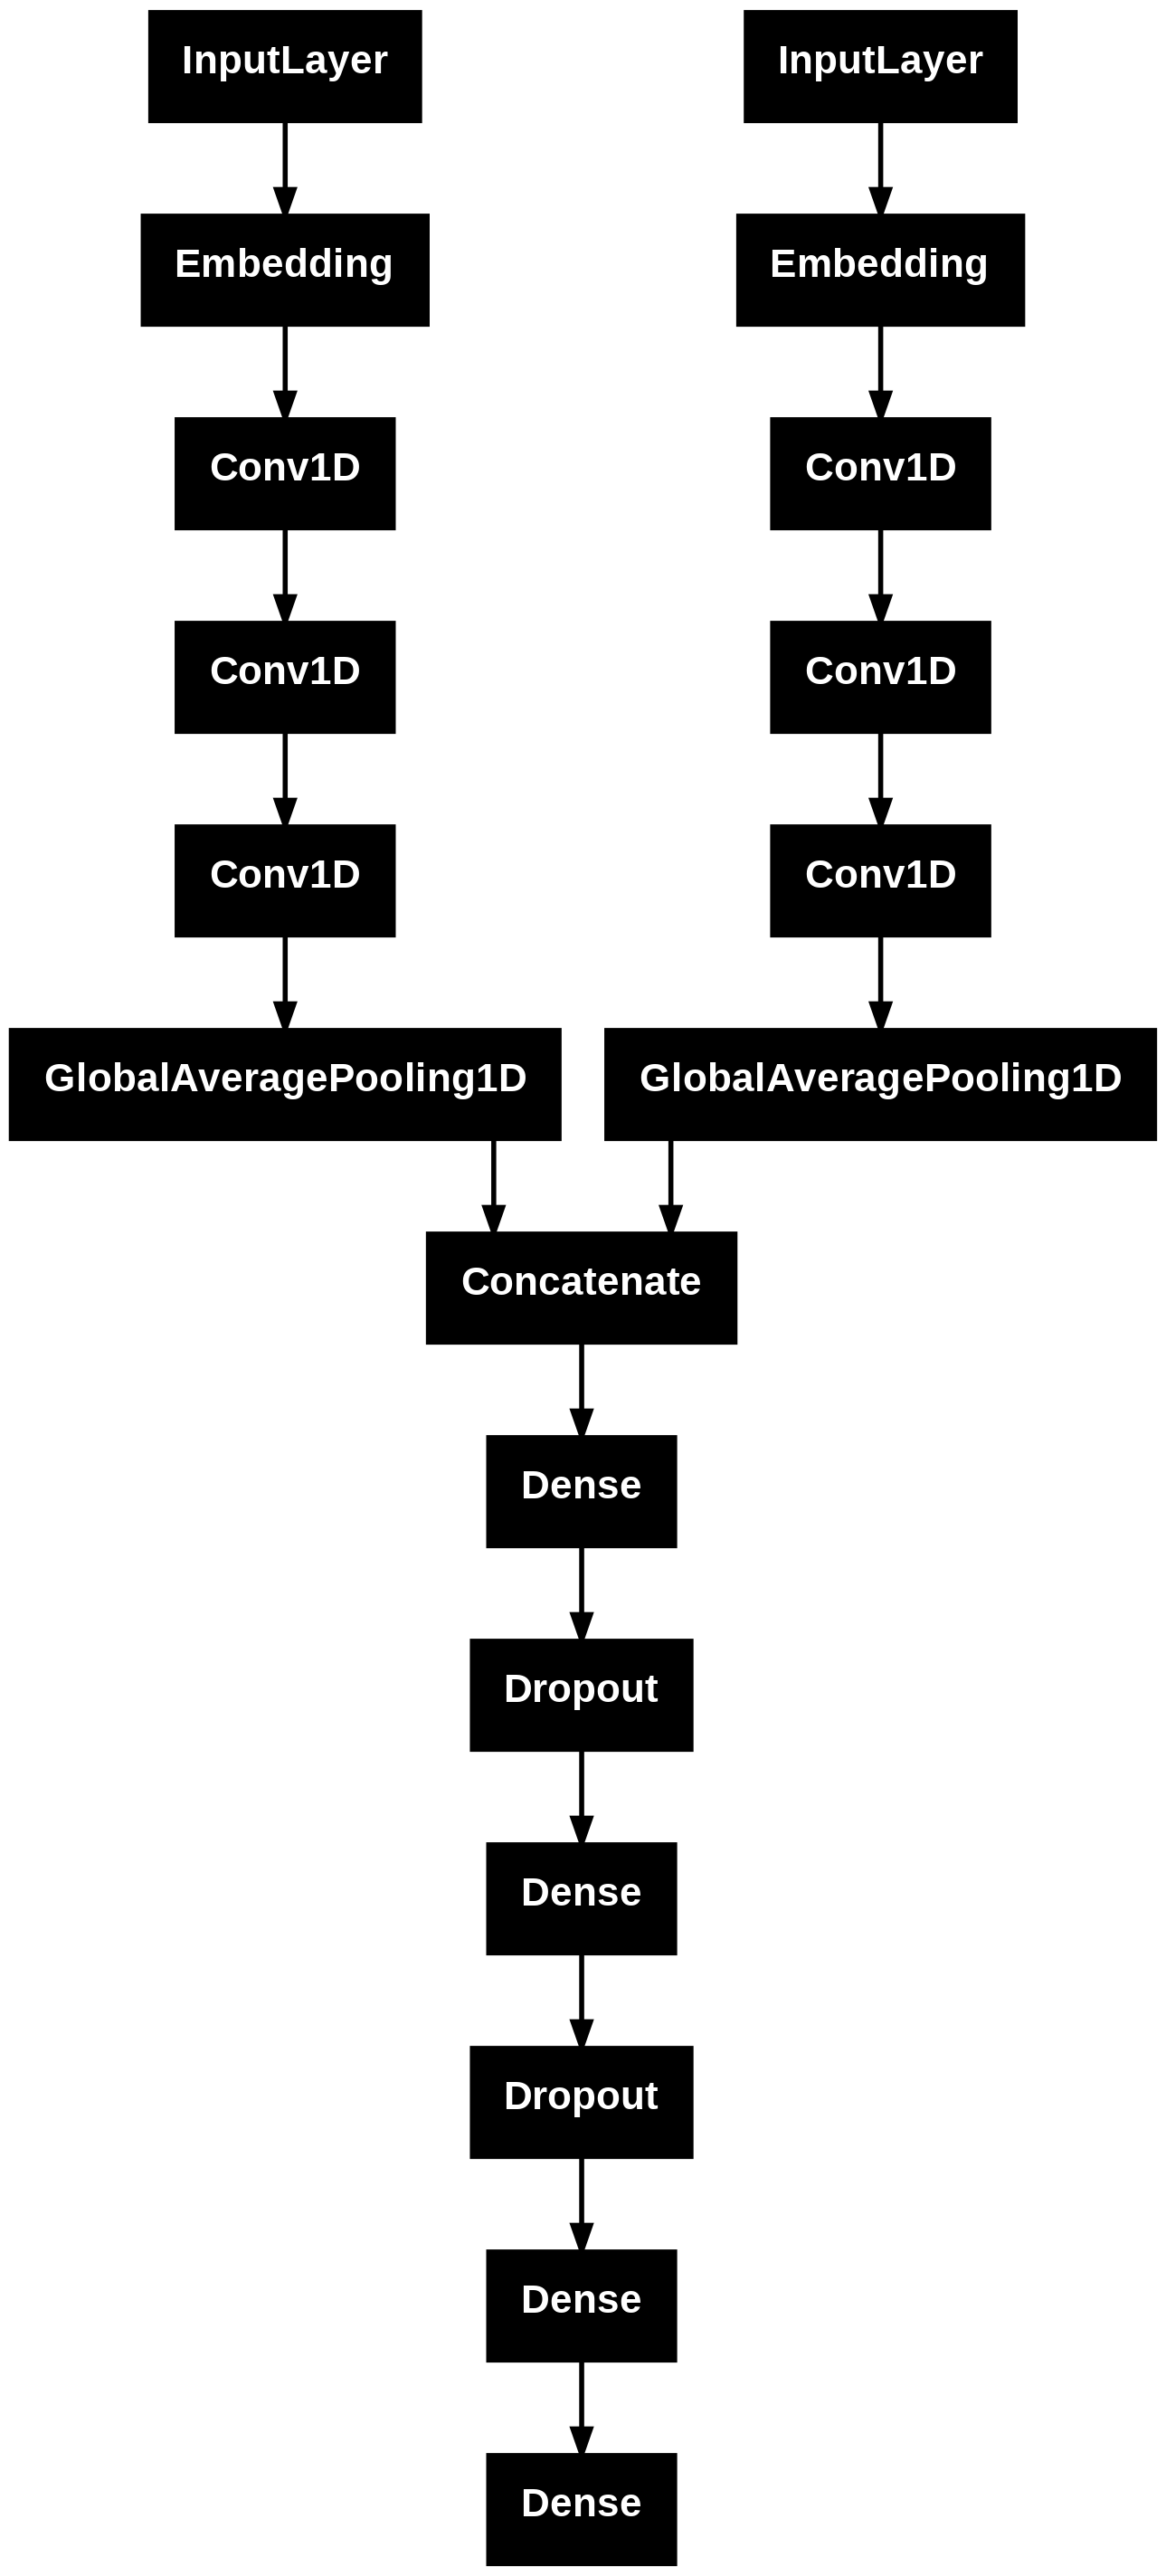

In [17]:
tf.keras.utils.plot_model(model)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(min_delta=0.001, patience=10, restore_best_weights=True,)

history = model.fit([train_drug_array, train_protein_array], train_affinity_array, epochs=100, batch_size=256, validation_data=([test_drug_array, test_protein_array], test_affinity_array), callbacks=[early_stopping])

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 48s 330ms/step - loss: 12.6131 - mse: 12.6131 - val_loss: 0.5723 - val_mse: 0.5723
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 60s 222ms/step - loss: 0.8283 - mse: 0.8283 - val_loss: 0.5775 - val_mse: 0.5775
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 23s 224ms/step - loss: 0.7797 - mse: 0.7797 - val_loss: 0.5835 - val_mse: 0.5835
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 225ms/step - loss: 0.7224 - mse: 0.7224 - val_loss: 0.5764 - val_mse: 0.5764
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - loss: 0.7161 - mse: 0.7161 - val_loss: 0.5650 - val_mse: 0.5650
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - loss: 0.7007 - mse: 0.7007 - val_loss: 0.5711 - val_mse: 0.5711
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - loss: 0.6923 - mse: 0.6923 - val_loss: 0.5571 - val_mse: 0.5571
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 41s 227ms/step - loss: 0.6851 - mse: 0.6851 - val_loss: 0.5545 - val_mse: 0.5545
Epoch 9/100
104/104 ━━

<Figure size 640x480 with 0 Axes>

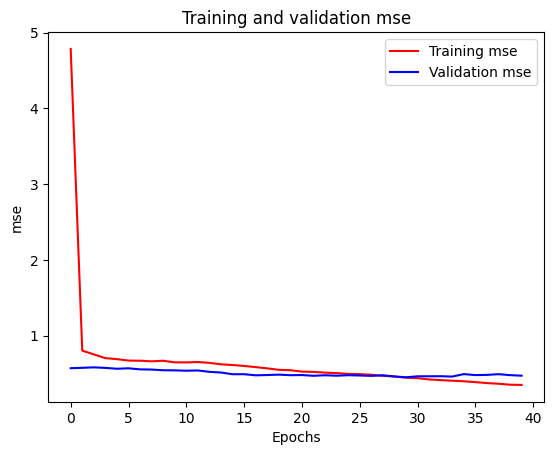

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

mse = history.history['mse']
val_mse= history.history['val_mse']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs = range(len(mse))

plt.plot(epochs, mse, 'r', label='Training mse')
plt.plot(epochs, val_mse, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()

plt.figure()

In [20]:
results = model.evaluate([test_drug_array, test_protein_array], test_affinity_array, batch_size=256)
print("Test Loss (MSE):", results[0])
print("Test MAE:", results[1])

from sklearn.metrics import r2_score

# Predict on test data
y_pred = model.predict([test_drug_array, test_protein_array])

# Calculate R² score
r2 = r2_score(test_affinity_array, y_pred)
print("R² Score:", r2)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3989 - mse: 0.3989
Test Loss (MSE): 0.45222023129463196
Test MAE: 0.45222023129463196
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
R² Score: 0.2613946199417114


In [21]:
model.save('deepDTA_model_v3.h5')

In [22]:
model.save('my_model_v3.keras')

In [25]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 81.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

In [27]:
!tensorflowjs_converter --input_format keras deepDTA_model_v3.h5 tfjs_model/

2024-12-02 13:15:29.156257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733145329.176240   12567 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733145329.182301   12567 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [28]:
def predict_affinity(drug, protein):
  drug_sequence = tokenizer_drug.texts_to_sequences([drug])
  drug_sequence = pad_sequences(drug_sequence, truncating = "post", maxlen = 85)
  protein_sequence = tokenizer_protein.texts_to_sequences([protein])
  protein_sequence = pad_sequences(protein_sequence, truncating = "post", maxlen = 1200)
  return model.predict([drug_sequence, protein_sequence]).item()

In [29]:
print(test_affinity[1531])
predict_affinity(test_drug[1531], test_protein[1531])

5.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


5.161553859710693